## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load the Dataset

In [ ]:
import pandas as pd

# Replace 'your_file.parquet' with your file path
df = pd.read_parquet("/content/drive/MyDrive/Audio_Genre_ML/0000 (1).parquet")

print(df.head())  # Show first few rows


   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


# Problem Statement

In the competitive landscape of music streaming, personalization and accurate music categorization are crucial for user engagement. This project focuses on building a machine learning model that classifies songs into genres using audio-based features collected from Spotify’s Web API. The dataset includes rich musical attributes such as tempo, danceability, energy, valence, and more, which can be used to understand the characteristics of different genres.

This genre classification model can serve as the backbone for a recommendation system that tailors suggestions based on a user’s preferred genres or listening behavior. Furthermore, this solution enables automatic tagging and playlist generation, ultimately enhancing the user experience and driving platform retention.

## Basic Dataset Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
df.shape

(114000, 21)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,114000.0,56999.500000,32909.109681,0.000,28499.75000,56999.500000,85499.2500,113999.000
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996


In [ ]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

## Check for Missing Values

In [ ]:
df.isnull().sum().sort_values(ascending= False)

,0
artists,1
track_name,1
album_name,1
Unnamed: 0,0
track_id,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


## Check Duplicates

In [ ]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


## Check Unique Values

In [ ]:
df.nunique().sort_values()

,0
explicit,2
mode,2
time_signature,5
key,12
popularity,101
track_genre,114
danceability,1174
speechiness,1489
liveness,1722
valence,1790


## Categorical vs Numerical Features

In [ ]:
categorical = df.select_dtypes(include='object').columns.tolist()
numerical = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical:", categorical)
print("Numerical:", numerical)


Categorical: ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']
Numerical: ['Unnamed: 0', 'popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


## Target Variable Distribution

## Top 15 most common genres

/tmp/ipython-input-8-4033229883.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


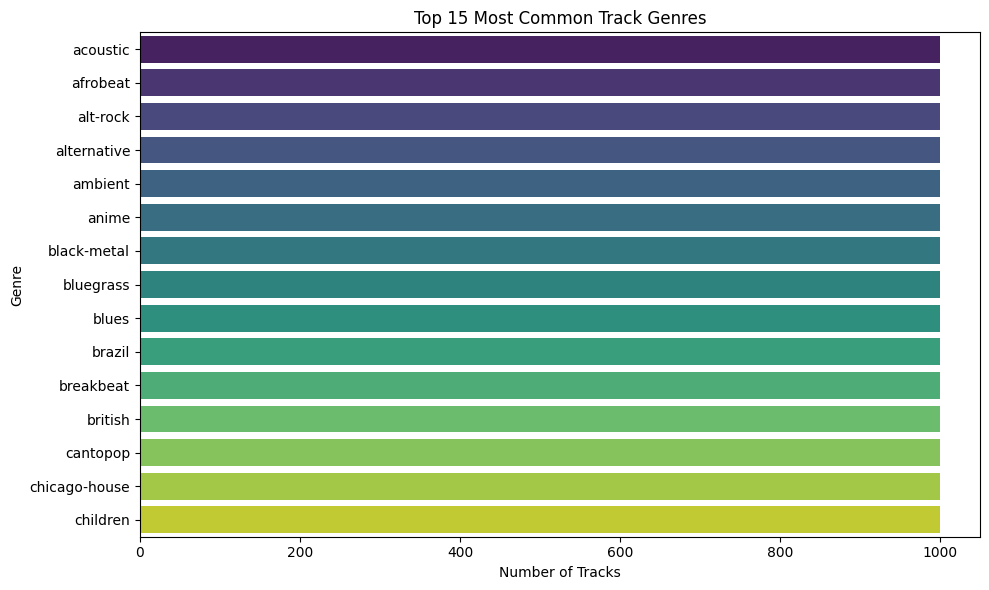

In [ ]:
top_genres = df['track_genre'].value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title("Top 15 Most Common Track Genres")
plt.xlabel("Number of Tracks")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


## Cumulative Percentage Plot

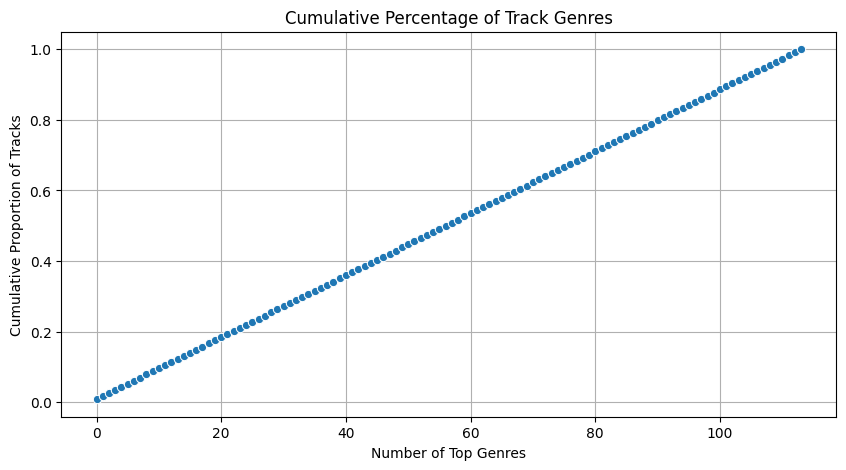

In [ ]:
genre_counts = df['track_genre'].value_counts(normalize=True).cumsum()

plt.figure(figsize=(10, 5))
sns.lineplot(x=range(len(genre_counts)), y=genre_counts.values, marker='o')
plt.title('Cumulative Percentage of Track Genres')
plt.xlabel('Number of Top Genres')
plt.ylabel('Cumulative Proportion of Tracks')
plt.grid(True)
plt.show()


The cumulative percentage plot of track_genre reveals a classic long-tail distribution in the dataset. A small number of genres dominate the majority of the tracks, while a large number of genres are represented by very few tracks each.

## Histogram

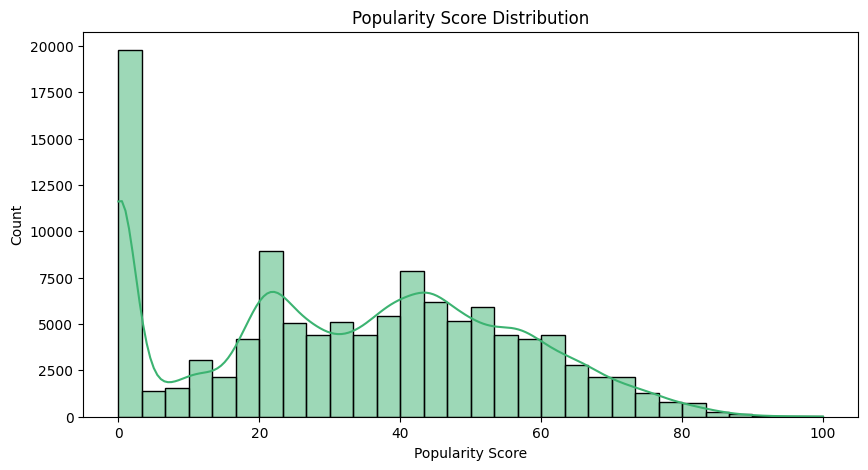

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['popularity'], bins=30, kde=True, color='mediumseagreen')
plt.title("Popularity Score Distribution")
plt.xlabel("Popularity Score")
plt.ylabel("Count")
plt.show()


## Histogram Analysis of popularity

The histogram of the popularity feature reveals a right-skewed (positively skewed) distribution. Most tracks are concentrated at the lower end of the popularity scale, indicating that:

🎵 Majority of tracks are not widely popular — they have low to moderate popularity scores.

🌟 Only a small subset of tracks reach high popularity (e.g., above 80), which could represent viral hits or top-charting songs.

📊 The distribution reflects a common real-world pattern in entertainment/media domains, where mass popularity is rare, and most items have modest reach

## Boxplot

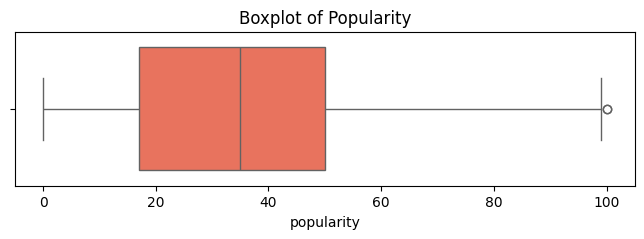

In [ ]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['popularity'], color='tomato')
plt.title("Boxplot of Popularity")
plt.show()


## Outliers (Dots/Circles):

One or more clear outliers are present at the high end (~95–100), suggesting a few exceptionally popular tracks. These outliers represent top-performing or viral songs that stand apart from the rest.

Since only 1 missing value per column out of 114,000, it's statistically negligible so, we can drop those rows

In [ ]:
df.isnull().sum().sort_values(ascending= False)

,0
artists,1
track_name,1
album_name,1
Unnamed: 0,0
track_id,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [ ]:
df[df['artists'].isnull()]  # Show the exact row


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,None,None,None,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


## Drop the row

In [ ]:
# Drop rows with any null values (very safe in our case)
df_clean = df.dropna(subset=['artists', 'track_name', 'album_name'])

In [ ]:
df_clean.isnull().sum().sort_values(ascending=False)

,0
Unnamed: 0,0
track_id,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [ ]:
df_clean.shape

(113999, 21)

## Drop Non-Useful Columns (for ML)

In [ ]:
df_model = df_clean.drop(columns=['Unnamed: 0', 'track_id', 'track_name', 'album_name', 'artists'])


In [ ]:
df_model.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

## Save as Pickle for Fast Reuse in ML Pipelines

In [ ]:
df_model.to_pickle("cleaned_spotify_data.pkl")


## Load

In [ ]:
df_loaded = pd.read_pickle("cleaned_spotify_data.pkl")


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [ ]:
# Set the target path
folder_path = '/content/drive/MyDrive/Audio_Genre_ML'

In [ ]:
# Save the cleaned DataFrame
df_model.to_pickle(f"{folder_path}/cleaned_spotify_data.pkl")
